# Exploration des relevés de données des bâtiments 

In [1]:
# importation des librairies nécessaires à l'exploration
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np 

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import pingouin as pg

In [2]:
# Paramétrage visuel
sns.set_palette("Pastel2")

- **SiteEUIWN :** Weather Normalized (WN) Site Energy Use Intensity (EUI) is a property's WN Site Energy divided by its gross floor area (in square feet). WN Site Energy is the Site Energy Use the property would have consumed during 30-year average weather conditions. WN Site EUI is measured in measured in thousands of British thermal units (kBtu) per square foot.
- **SourceEUIWN :** Weather Normalized (WN) Source Energy Use Intensity (EUI) is a property's WN Source Energy divided by its gross floor area. WN Source Energy is the Source Energy Use the property would have consumed during 30-year average weather conditions. WN Source EUI is measured in measured in thousands of British thermal units (kBtu) per square foot.
- **SiteEnergyUse :** The annual amount of energy consumed by the property from all sources of energy.
- **GHGEmissions :** The total amount of greenhouse gas emissions, including carbon dioxide, methane, and nitrous oxide gases released into the atmosphere as a result of energy consumption at the property, measured in metric tons of carbon dioxide equivalent. This calculation uses a GHG emissions factor from Seattle CIty Light's portfolio of generating resources. This uses Seattle City Light's 2015 emissions factor of 52.44 lbs CO2e/MWh. Enwave steam factor = 170.17 lbs CO2e/MMBtu. Gas factor sourced from EPA Portfolio Manager = 53.11 kg CO2e/MBtu. 
- **GHGEmissions Intensity :** Total Greenhouse Gas Emissions divided by property's gross floor area, measured in kilograms of carbon dioxide equivalent per square foot. This calculation uses a GHG emissions factor from Seattle City Light's portfolio of generating resources.

*Source* : [Ville de Seattle](!https://data.seattle.gov/dataset/2015-Building-Energy-Benchmarking/h7rm-fz6m)

*Autres sources :*

- [Différence entre source et site](!https://www.energystar.gov/buildings/benchmark/understand_metrics/source_site_difference)
- [Définition de l'EUI](!https://www.energystar.gov/buildings/benchmark/understand_metrics/what_eui)
- [Energy Star Score](!https://www.energystar.gov/buildings/benchmark/analyze_benchmarking_results)
- [Définition des types de bâtiments](!https://portfoliomanager.energystar.gov/pm/glossary)

## Traitement des données de 2015

In [3]:
# Chargement du fichier de 2015
filepath_2015 = 'datasets/2015-building-energy-benchmarking.csv'
df_2015 = pd.read_csv(filepath_2015)
df_2015.head(3)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,...,GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,...,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,...,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,...,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081


In [4]:
# Passage des chaînes de caractères en minuscule
df_2015['PropertyName'] = df_2015["PropertyName"].str.capitalize()
df_2015['Neighborhood'] = df_2015["Neighborhood"].str.capitalize()

In [5]:
df_2015.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'Location',
       'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)',
       'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)',
       'DefaultData', '

In [6]:
df_2015["Outlier"].value_counts()

High Outlier    46
Low Outlier     38
Name: Outlier, dtype: int64

In [7]:
# Retrait des valeurs "outlier"
df_2015 = df_2015.loc[~(df_2015["Outlier"] == "High Outlier") |
                      ~(df_2015["Outlier"] == "Low Outlier")]

In [8]:
df_2015.isnull().mean() * 100

OSEBuildingID                                                     0.000000
DataYear                                                          0.000000
BuildingType                                                      0.000000
PrimaryPropertyType                                               0.000000
PropertyName                                                      0.000000
TaxParcelIdentificationNumber                                     0.059880
Location                                                          0.000000
CouncilDistrictCode                                               0.000000
Neighborhood                                                      0.000000
YearBuilt                                                         0.000000
NumberofBuildings                                                 0.000000
NumberofFloors                                                    0.239521
PropertyGFATotal                                                  0.000000
PropertyGFAParking       

In [9]:
# Suppression des colonnes avec plus de 50% de valeurs manquantes
# Suppression des lignes avec plus de 4 NaN
df_2015 = df_2015.loc[:, df_2015.isnull().mean() <.50]
df_2015.dropna(thresh=4, inplace=True)

In [10]:
# Suppression des colonnes dont les informations n'auront pas d'utilité dans la suite de l'étude
df_2015.drop(["TaxParcelIdentificationNumber","Location","CouncilDistrictCode",
              "ListOfAllPropertyUseTypes", "LargestPropertyUseType", "PropertyGFAParking",
              "DefaultData", "ComplianceStatus", 
              "Seattle Police Department Micro Community Policing Plan Areas","SPD Beats", "Zip Codes"], axis = 1, inplace=True) 

In [11]:
# Harmonisation des noms de colonnes avec le dataset de 2016
df_2015.rename(columns={"GHGEmissions(MetricTonsCO2e)":"TotalGHGEmissions",
                        "GHGEmissionsIntensity(kgCO2e/ft2)" : "GHGEmissionsIntensity"}, inplace=True)

## Traitement des données de 2016

Les données de 2016 sont traitées de la même manière que celle de 2015 pour permettre de pouvoir réunir les deux datasets ensemble. Les colonnes supprimées pour le dataset de 2015 ont été supprimés pour celui de 2016. 

In [12]:
# Chargement du fichier de 2016
filepath_2016 = 'datasets/2016-building-energy-benchmarking.csv'
df_2016 = pd.read_csv(filepath_2016)
df_2016.head(3)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19


In [13]:
df_2016['PropertyName'] = df_2016["PropertyName"].str.capitalize()
df_2016['Neighborhood'] = df_2016["Neighborhood"].str.capitalize()

In [14]:
df_2016["Outlier"].value_counts()

Low outlier     23
High outlier     9
Name: Outlier, dtype: int64

In [15]:
df_2016 = df_2016.loc[~(df_2016["Outlier"] == "High Outlier") |
                      ~(df_2016["Outlier"] == "Low Outlier")]

In [16]:
df_2016.isnull().mean() * 100

OSEBuildingID                        0.000000
DataYear                             0.000000
BuildingType                         0.000000
PrimaryPropertyType                  0.000000
PropertyName                         0.000000
Address                              0.000000
City                                 0.000000
State                                0.000000
ZipCode                              0.473934
TaxParcelIdentificationNumber        0.000000
CouncilDistrictCode                  0.000000
Neighborhood                         0.000000
Latitude                             0.000000
Longitude                            0.000000
YearBuilt                            0.000000
NumberofBuildings                    0.236967
NumberofFloors                       0.000000
PropertyGFATotal                     0.000000
PropertyGFAParking                   0.000000
PropertyGFABuilding(s)               0.000000
ListOfAllPropertyUseTypes            0.266588
LargestPropertyUseType            

In [17]:
df_2016 = df_2016.loc[:, df_2016.isnull().mean() <.50]
df_2016.dropna(thresh=4, inplace=True) 

In [18]:
df_2016.drop(["TaxParcelIdentificationNumber", "Address", "City", "State", "Latitude", "Longitude","ZipCode","CouncilDistrictCode",
              "ListOfAllPropertyUseTypes", "LargestPropertyUseType", "PropertyGFAParking",
              "DefaultData", "ComplianceStatus"], axis = 1, inplace=True) 

## Création d'un dataset avec les données de 2015 & 2016

In [19]:
# Jointure entre le dataset de 2015 et de 2016
df = pd.concat([df_2015,df_2016], join="outer", ignore_index=True, verify_integrity=True)
df.head(3)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
0,1,2015,NonResidential,Hotel,Mayflower park hotel,Downtown,1927,1.0,12.0,88434,...,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64
1,2,2015,NonResidential,Hotel,Paramount hotel,Downtown,1996,1.0,11.0,103566,...,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38
2,3,2015,NonResidential,Hotel,Westin hotel,Downtown,1969,1.0,41.0,961990,...,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92


## Traitement du dataset crée

In [20]:
df = df.loc[df["DataYear"] == 2015]

In [21]:
# Conservation des bâtiments non résidentiel
df = df.loc[(df["BuildingType"] == "NonResidential") |
            (df["BuildingType"] == "SPS-District K-12")| 
            (df["BuildingType"] == "Nonresidential COS")|
            (df["BuildingType"] == "Campus")]

In [22]:
# Harmonisation des chaînes de caractères
char_correction = {"Distribution Center\n" : "Distribution Center",
                   "Self-Storage Facility\n" : "Self-Storage Facility",
                   "Restaurant\n" : "Restaurant",
                   "Supermarket / Grocery Store": "Supermarket/Grocery Store",
                   "Residence Hall/Dormitory" : "Residence Hall"}

for key, value in char_correction.items():
    df['PrimaryPropertyType'].loc[df["PrimaryPropertyType"].str.contains(key, case=False, regex=False)] = value

In [23]:
neighborhood_correction = {"Delridge neighborhoods": "Delridge"}

for key, value in neighborhood_correction.items():
    df["Neighborhood"].loc[df["Neighborhood"].str.contains(key, case=False, regex=False)] = value

In [24]:
df = df.loc[~(df["PrimaryPropertyType"] == "Low-Rise Multifamily")]

In [25]:
df = df.loc[~(df["NumberofBuildings"] == 0)]

In [26]:
# Suppression des colonnes redondantes
df.drop(["OSEBuildingID","PropertyName","DataYear", "PropertyGFABuilding(s)","LargestPropertyUseTypeGFA", "SiteEUI(kBtu/sf)", "SourceEUI(kBtu/sf)", "SiteEUIWN(kBtu/sf)",
         "SiteEnergyUse(kBtu)", "Electricity(kWh)", "NaturalGas(therms)"], axis=1, inplace=True)

In [27]:
df.shape

(1648, 16)

Après fusion des deux datasets, un traitement a été effectué pour permettre de ne conserver que les bâtiments qui ne sont pas des bâtiments non résidentiels. Ensuite, une harmonisation des chaînes de caractères a été effectué pour enlever les doublons à cause de différences dans la saisie des données. Enfin, les données énergétiques sont exprimées dans deux unités : en kBtu et en kWh. Pour des raisons pratiques, seules les données exprimées en kBtu sont conservées. Ensuite selon les informations du site energystar.gov, il est conseillé de travailler sur les données de type "Source" au lieu des données de type "Site". Enfin, les données normalisées sur la météo ont été conservées. 

# Feature Engineering

In [28]:
property_use = {"K-12 School" : "Educational Building",
                "University" : "Educational Building",
                "College/University" : "Educational Building",
                "SPS-District K-12" : "Educational Building",
                "Laboratory" : "Other"}

for key, value in property_use.items():
    df['PrimaryPropertyType'].loc[df["PrimaryPropertyType"].str.contains(key, case=False, regex=False)] = value

In [29]:
df["DecadeBuilt"] = pd.cut(df["YearBuilt"], 12, 
labels=['1900s', '1910s', '1920s', '1930s', '1940s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s'], ordered=True)

In [30]:
bins = [1, 2, 10, 20, 100]

df['NoBuildings'] = pd.cut(df["NumberofBuildings"], bins, 
                   labels=["1-2", "2-10", "11-20", "21+"], ordered=True)

In [31]:
bins = [0, 1, 5, 10, 15, 20, 30, 40, 50, 100]

df["NoFloors"] = pd.cut(df["NumberofFloors"], bins, 
                 labels=["0-1", "2-5", "6-10", "11-15", "16-20", "21-30", "31-40", "41-50", "50+"], ordered=True)

In [32]:
df["pct_SteamUse"] = ((df["SteamUse(kBtu)"]/df["SiteEnergyUseWN(kBtu)"]) * 100).round(2)
df["pct_Electricity"] = ((df["Electricity(kBtu)"]/df["SiteEnergyUseWN(kBtu)"]) * 100).round(2)
df["pct_NaturalGas"] = ((df["NaturalGas(kBtu)"]/df["SiteEnergyUseWN(kBtu)"]) * 100).round(2)
df["pct_OtherFuelUse"] = ((df["OtherFuelUse(kBtu)"]/df["SiteEnergyUseWN(kBtu)"]) * 100).round(2)

In [33]:
df.head(3)

,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,ENERGYSTARScore,SourceEUIWN(kBtu/sf),SiteEnergyUseWN(kBtu),...,OtherFuelUse(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DecadeBuilt,NoBuildings,NoFloors,pct_SteamUse,pct_Electricity,pct_NaturalGas,pct_OtherFuelUse
0,NonResidential,Hotel,Downtown,1927,1.0,12.0,88434,65.0,175.1,7097539.0,...,0.0,249.43,2.64,1920s,NaN,11-15,28.50,51.94,17.93,0.0
1,NonResidential,Hotel,Downtown,1996,1.0,11.0,103566,51.0,195.2,8765788.0,...,0.0,263.51,2.38,2000s,NaN,11-15,0.00,44.55,50.75,0.0
2,NonResidential,Hotel,Downtown,1969,1.0,41.0,961990,18.0,246.5,75506272.0,...,0.0,2061.48,1.92,1970s,NaN,41-50,26.04,65.91,4.91,0.0


# Analyse exploratoire

La première étape avant de débuter l'analyse exploratoire est de séparer notre jeu de données en deux parties. Le jeu de test ne sera utilisé que pour tester les performances du modèle choisi. Cette étape est réalisée pour éviter la fuite de données. 

## Séparation du jeu de données

On crée un jeu de données d'entraînement qui va être celui que l'on va analyser durant l'analyse exploratoire des données. Le jeu de test sera laissé de côté pour valider nos modèles.  Le jeu de test contiendra 20% des données de notre échantillon et sera stratifié sur le type de propriété. Le but est de s'assurer que l'on retrouve bien toutes les valeurs de cette variable dans nos deux échantillons. 

In [34]:
from sklearn.model_selection import train_test_split

test_set, train_set = train_test_split(df, test_size=0.2, random_state=42, stratify=df["PrimaryPropertyType"])

In [35]:
# Enregistrement des datasets séparés pour pouvoir effectuer les modèles dans un autre notebook
test_set.to_csv("datasets/test_set.csv", index=False)
train_set.to_csv("datasets/train_set.csv", index=False)

In [36]:
df = test_set.copy()

## Analyses descriptives

In [37]:
df.shape

(1318, 23)

In [38]:
df.columns

Index(['BuildingType', 'PrimaryPropertyType', 'Neighborhood', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'ENERGYSTARScore', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUseWN(kBtu)',
       'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)',
       'OtherFuelUse(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity',
       'DecadeBuilt', 'NoBuildings', 'NoFloors', 'pct_SteamUse',
       'pct_Electricity', 'pct_NaturalGas', 'pct_OtherFuelUse'],
      dtype='object')

In [39]:
cat_var = ["BuildingType", "PrimaryPropertyType", "Neighborhood",
           "NumberofBuildings", "NoFloors", "NoBuildings", "DecadeBuilt"]

num_var = ["YearBuilt", "NumberofFloors", "PropertyGFATotal",
           "ENERGYSTARScore", "SourceEUIWN(kBtu/sf)", "SteamUse(kBtu)",
           "Electricity(kBtu)", "NaturalGas(kBtu)", 
           "OtherFuelUse(kBtu)","TotalGHGEmissions", "GHGEmissionsIntensity"]

In [40]:
for col in num_var : 
    ind = df.loc[(df[col] < 0)].index.to_list()
    df.drop(index=ind, inplace=True)

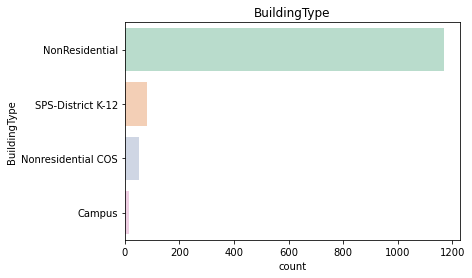

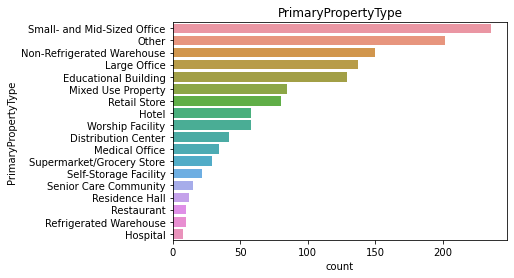

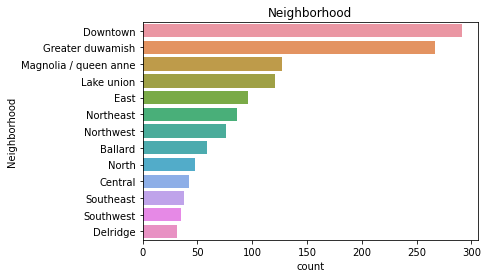

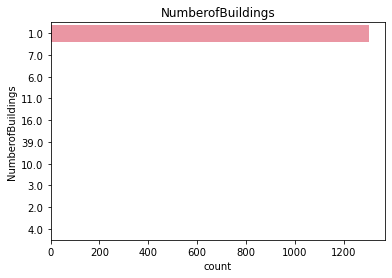

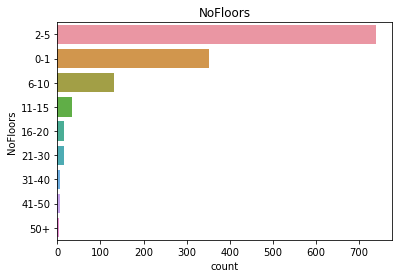

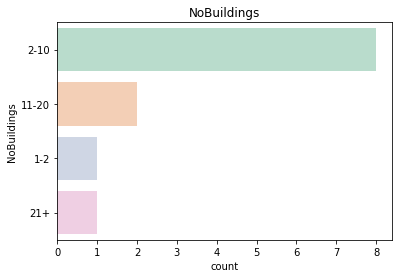

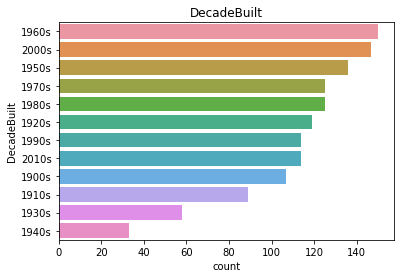

In [41]:
for cols in cat_var:
    sns.countplot(y=cols, data=df, order=df[cols].value_counts().index)
    plt.title(cols)
    plt.show()

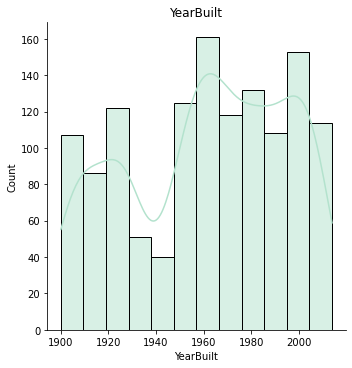

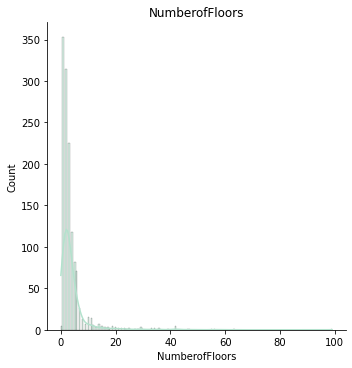

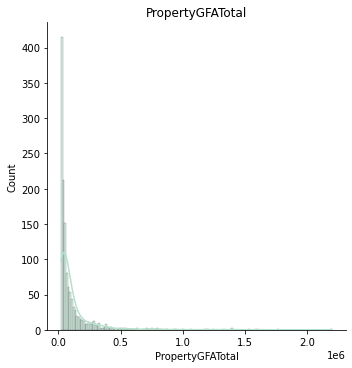

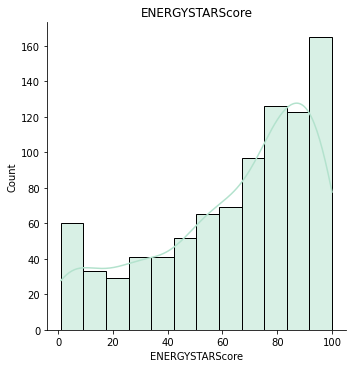

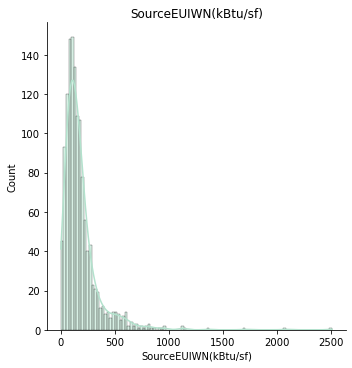

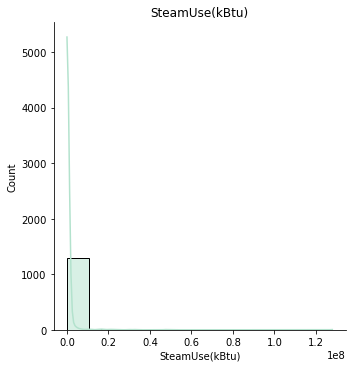

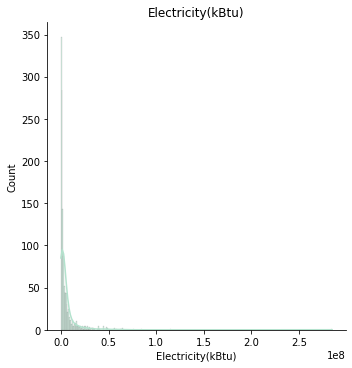

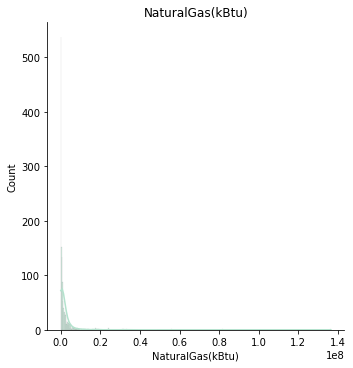

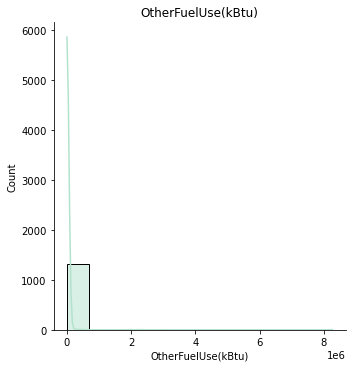

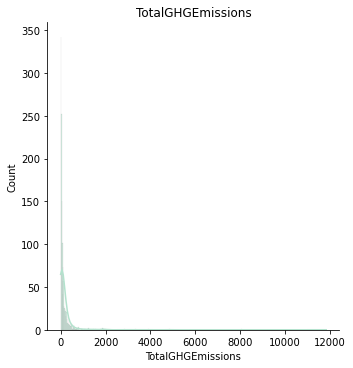

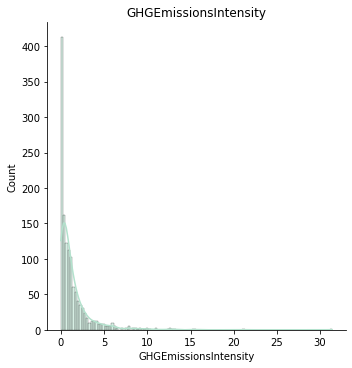

In [42]:
for cols in num_var:
    sns.displot(x=cols, data=df, kde=True)
    plt.title(cols)
    plt.show()

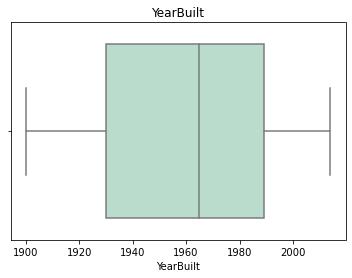

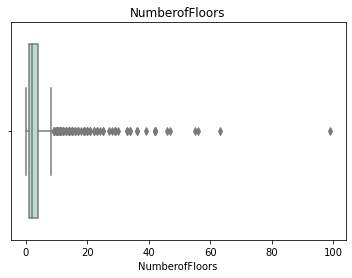

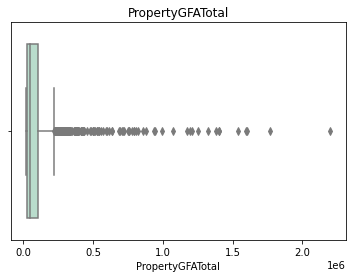

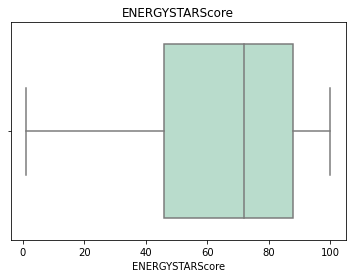

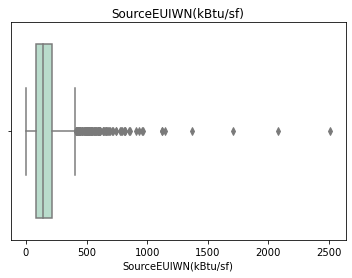

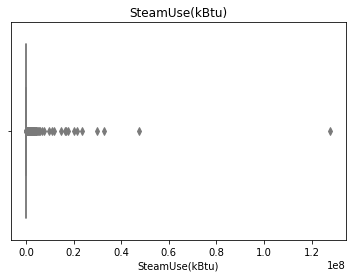

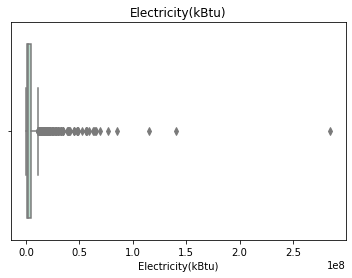

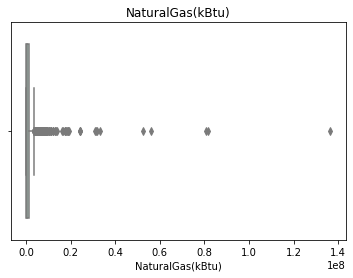

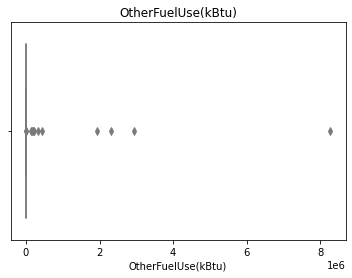

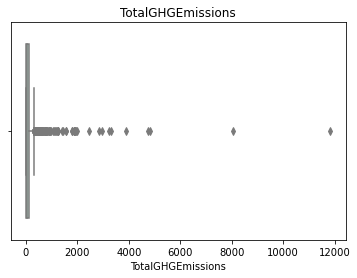

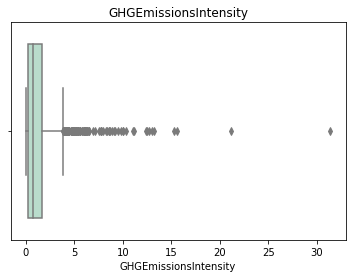

In [43]:
for cols in num_var:
    sns.boxplot(x=cols, data=df)
    plt.title(cols)
    plt.show()

In [44]:
pg.normality(df,method="shapiro")

,W,pval,normal
YearBuilt,0.946490,1.879012e-21,False
NumberofBuildings,0.038798,0.000000e+00,False
NumberofFloors,0.437523,0.000000e+00,False
PropertyGFATotal,0.468756,0.000000e+00,False
ENERGYSTARScore,0.909972,1.169452e-22,False
SourceEUIWN(kBtu/sf),0.660590,4.203895e-45,False
SiteEnergyUseWN(kBtu),0.343616,0.000000e+00,False
SteamUse(kBtu),0.069188,0.000000e+00,False
Electricity(kBtu),0.356391,0.000000e+00,False
NaturalGas(kBtu),0.237869,0.000000e+00,False


In [45]:
pg.homoscedasticity(df, method="levene")

,W,pval,equal_var
levene,NaN,NaN,False


In [46]:
df.describe()

,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,ENERGYSTARScore,SourceEUIWN(kBtu/sf),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),OtherFuelUse(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,pct_SteamUse,pct_Electricity,pct_NaturalGas,pct_OtherFuelUse
count,1317.000000,1317.000000,1312.000000,1.317000e+03,901.000000,1311.000000,1.311000e+03,1.311000e+03,1.311000e+03,1.311000e+03,1.311000e+03,1311.000000,1311.000000,1302.0,1309.00,1306.0000,1303.0
mean,1961.217160,1.080486,4.096037,1.123002e+05,64.286349,181.008848,7.744766e+06,4.147372e+05,5.358572e+06,1.765157e+06,1.294443e+04,163.115347,1.364447,inf,inf,inf,inf
std,32.962352,1.236928,6.427908,1.907553e+05,28.567778,180.605289,1.848590e+07,4.251414e+06,1.299415e+07,6.145848e+06,2.567564e+05,529.278377,2.126851,NaN,NaN,NaN,NaN
min,1900.000000,1.000000,0.000000,2.000000e+04,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0,2.78,0.0000,0.0
25%,1930.000000,1.000000,1.000000,2.987400e+04,46.000000,82.850000,1.381334e+06,0.000000e+00,7.328205e+05,0.000000e+00,0.000000e+00,20.615000,0.175000,0.0,45.23,0.0000,0.0
50%,1965.000000,1.000000,2.000000,4.995000e+04,72.000000,136.900000,2.707837e+06,0.000000e+00,1.625316e+06,4.789100e+05,0.000000e+00,49.610000,0.690000,0.0,67.31,22.9850,0.0
75%,1989.000000,1.000000,4.000000,1.051000e+05,88.000000,213.100000,7.161244e+06,0.000000e+00,4.938016e+06,1.464466e+06,0.000000e+00,137.190000,1.640000,0.0,94.21,44.0175,0.0
max,2014.000000,39.000000,99.000000,2.200000e+06,100.000000,2511.000000,2.927463e+08,1.278697e+08,2.847263e+08,1.364484e+08,8.269669e+06,11824.890000,31.380000,inf,inf,inf,inf


### Analyses bivariées

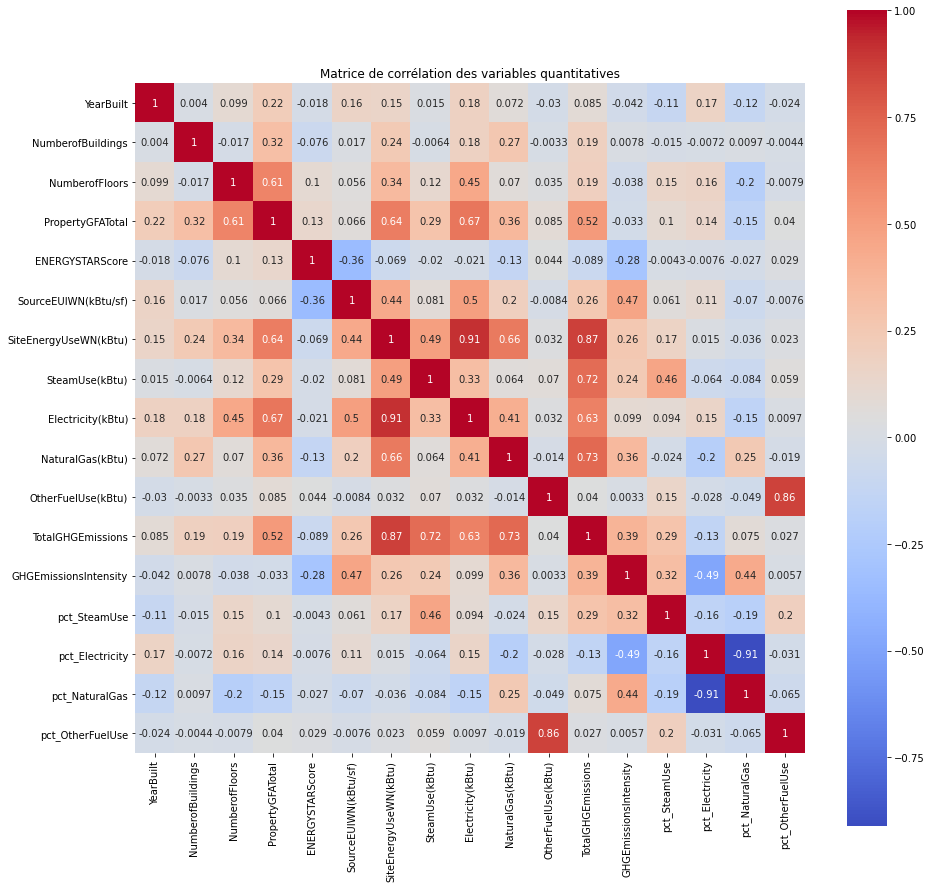

In [47]:
matrix = df.corr()

plt.figure(figsize=(15, 15))
sns.heatmap(matrix, square=True, annot=True, cmap="coolwarm")
plt.title("Matrice de corrélation des variables quantitatives")
plt.show()

In [48]:
matrix['ENERGYSTARScore'].sort_values(ascending=False)

ENERGYSTARScore          1.000000
PropertyGFATotal         0.129542
NumberofFloors           0.103033
OtherFuelUse(kBtu)       0.043774
pct_OtherFuelUse         0.029235
pct_SteamUse            -0.004326
pct_Electricity         -0.007582
YearBuilt               -0.018363
SteamUse(kBtu)          -0.020180
Electricity(kBtu)       -0.021332
pct_NaturalGas          -0.026692
SiteEnergyUseWN(kBtu)   -0.069198
NumberofBuildings       -0.075827
TotalGHGEmissions       -0.089405
NaturalGas(kBtu)        -0.126374
GHGEmissionsIntensity   -0.284985
SourceEUIWN(kBtu/sf)    -0.356753
Name: ENERGYSTARScore, dtype: float64

In [49]:
matrix['SourceEUIWN(kBtu/sf)'].sort_values(ascending=False)

SourceEUIWN(kBtu/sf)     1.000000
Electricity(kBtu)        0.496707
GHGEmissionsIntensity    0.469753
SiteEnergyUseWN(kBtu)    0.443923
TotalGHGEmissions        0.259051
NaturalGas(kBtu)         0.200505
YearBuilt                0.162925
pct_Electricity          0.109326
SteamUse(kBtu)           0.081273
PropertyGFATotal         0.066457
pct_SteamUse             0.060868
NumberofFloors           0.056019
NumberofBuildings        0.016523
pct_OtherFuelUse        -0.007572
OtherFuelUse(kBtu)      -0.008448
pct_NaturalGas          -0.070153
ENERGYSTARScore         -0.356753
Name: SourceEUIWN(kBtu/sf), dtype: float64

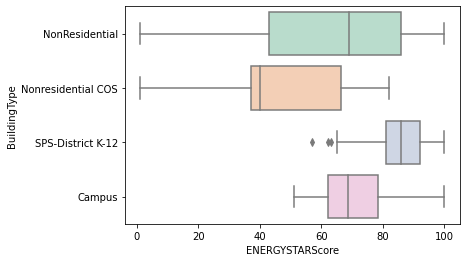

In [50]:
sns.boxplot(x="ENERGYSTARScore", y="BuildingType", data=df)
plt.show()

In [51]:
pg.anova(data=df, dv="ENERGYSTARScore", between="BuildingType")

,Source,ddof1,ddof2,F,p-unc,np2
0,BuildingType,3,897,15.452637,8.288736e-10,0.049141


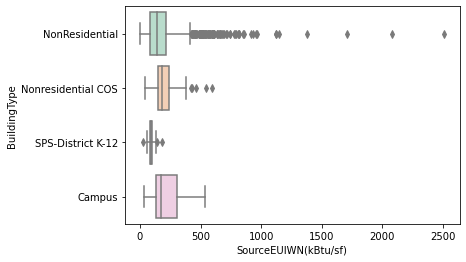

In [52]:
sns.boxplot(x="SourceEUIWN(kBtu/sf)", y="BuildingType", data=df)
plt.show()

In [53]:
pg.anova(data=df, dv="SourceEUIWN(kBtu/sf)", between="BuildingType")

,Source,ddof1,ddof2,F,p-unc,np2
0,BuildingType,3,1307,7.607887,0.000048,0.017163


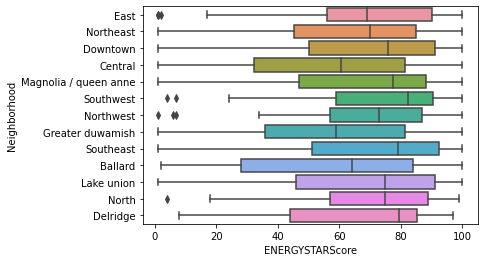

In [54]:
sns.boxplot(x="ENERGYSTARScore", y="Neighborhood", data=df)
plt.show()

In [55]:
pg.anova(data=df, dv="ENERGYSTARScore", between="Neighborhood")

,Source,ddof1,ddof2,F,p-unc,np2
0,Neighborhood,12,888,2.061679,0.017167,0.027105


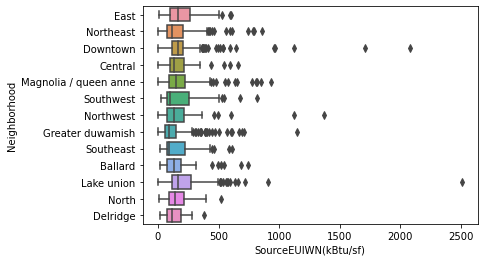

In [56]:
sns.boxplot(x="SourceEUIWN(kBtu/sf)", y="Neighborhood", data=df)
plt.show()

In [57]:
pg.anova(data=df, dv="SourceEUIWN(kBtu/sf)", between="Neighborhood")

,Source,ddof1,ddof2,F,p-unc,np2
0,Neighborhood,12,1298,3.559126,0.000031,0.031856


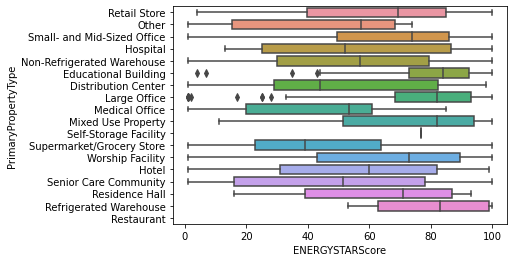

In [58]:
sns.boxplot(x="ENERGYSTARScore", y="PrimaryPropertyType", data=df)
plt.show()

In [59]:
pg.anova(data=df, dv="ENERGYSTARScore", between="PrimaryPropertyType")

,Source,ddof1,ddof2,F,p-unc,np2
0,PrimaryPropertyType,16,884,8.792059,3.192653e-20,0.137286


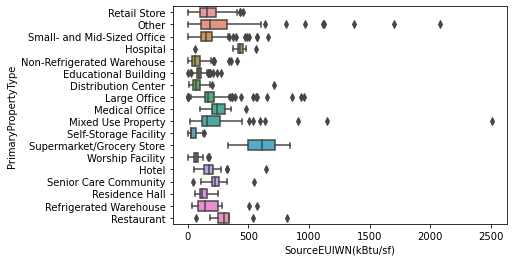

In [60]:
sns.boxplot(x="SourceEUIWN(kBtu/sf)", y="PrimaryPropertyType", data=df)
plt.show()

In [61]:
pg.anova(data=df, dv="SourceEUIWN(kBtu/sf)", between="PrimaryPropertyType")

,Source,ddof1,ddof2,F,p-unc,np2
0,PrimaryPropertyType,17,1293,28.57319,1.545999e-77,0.273083
